In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

In [2]:
# here wea are setting the style and size of the figures that we will be producing. I reccomend that you use these setting as well but
# you are free to experiment with them. The complete list of plot styles(plt.style) can be found by the link below. 
# (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('_classic_test_patch')

In [3]:
df = pd.read_csv("merged_data.csv")

In [4]:
df.head()

,date,us_pop,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths,gdp_period,yearly_infl
0,2000-01-31,280730000.0,0.665408,1.511417,0.631568,0.0,0.0,0.923307,0.0,0.0,3.562918,0.001203
1,2000-02-29,280940000.0,0.584110,1.762654,0.590162,0.0,0.0,0.832206,0.0,0.0,3.560255,0.001202
2,2000-03-31,281160000.0,0.578318,2.136862,0.609973,0.0,0.0,0.896287,0.0,0.0,3.557469,0.001201
3,2000-04-30,281420000.0,0.552910,1.902139,0.627176,0.0,0.0,0.882311,0.0,0.0,3.641433,0.001200
4,2000-05-31,281640000.0,0.563840,2.284832,0.646570,0.0,0.0,0.930976,0.0,0.0,3.638588,0.001199


<AxesSubplot:>

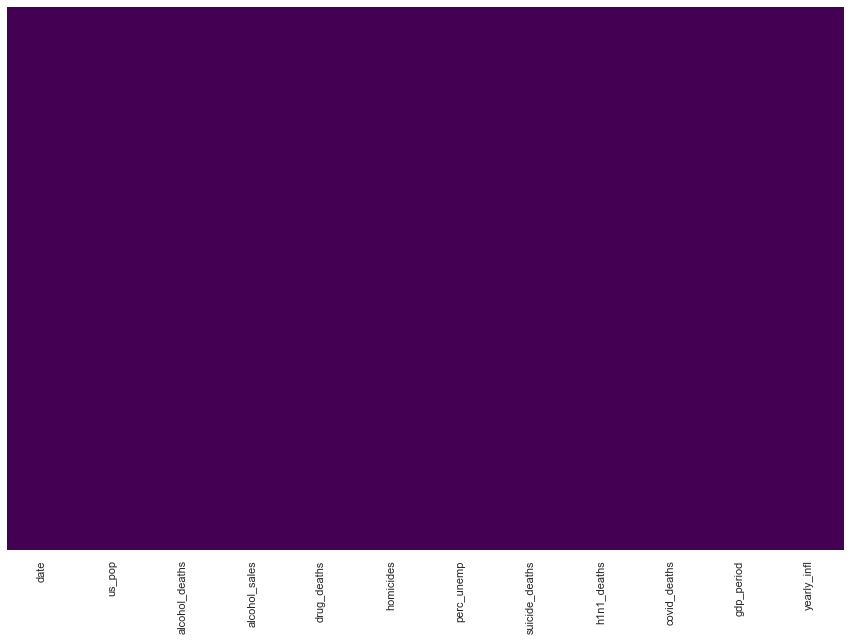

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df = df.set_index('date')

In [7]:
df.dtypes

us_pop            float64
alcohol_deaths    float64
alcohol_sales     float64
drug_deaths       float64
homicides         float64
perc_unemp        float64
suicide_deaths    float64
h1n1_deaths       float64
covid_deaths      float64
gdp_period        float64
yearly_infl       float64
dtype: object

In [8]:
# This function is going to help me plot my data for the rest of the notebook. Although Python has powerful plotting abilities, it is 
# sometimes difficult to get the graph exactly as you want. The function below is capable of producing a proper and informative graph. 

# This function is written to plot the data from each column of your dataframe. It also accepts two parameters, the dataframe you want 
# to plot and any exemptions you want to make to the plot. If there are no exemptions just leave the space with an empty set of 
# quotes(""). 

def multiline(dataframe, exemptions):
    for col in dataframe.columns:
        if not col == exemptions:
            ax = plt.plot(dataframe.index, dataframe[col], label=col)
            listOf_Xticks = np.arange(0, len(dataframe), 24 )
            plt.xticks(listOf_Xticks)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

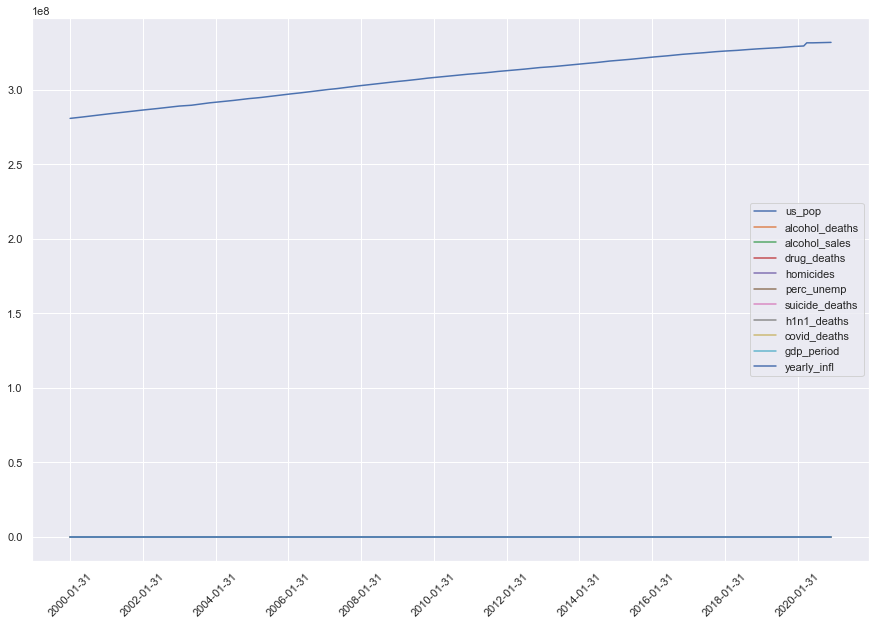

In [9]:
multiline(df,'')

As you can see above, the population of the us is so much greater than the other variables that it dominates the graph. We will have to list is an exemption. 

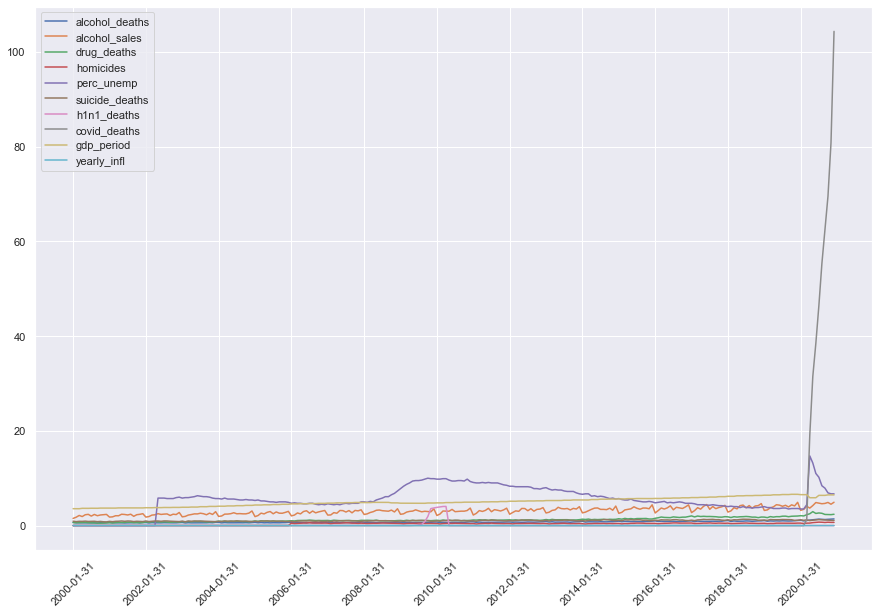

In [10]:
multiline(df, 'us_pop')

Much better! The volume of covid deaths compared to the rest of the data is shocking! If you can see, the h1n1 deaths are represented as the pink line which has a small spike around 2010. This value is no where near to the volume of covid deaths. Will it qualify as a pandemic?

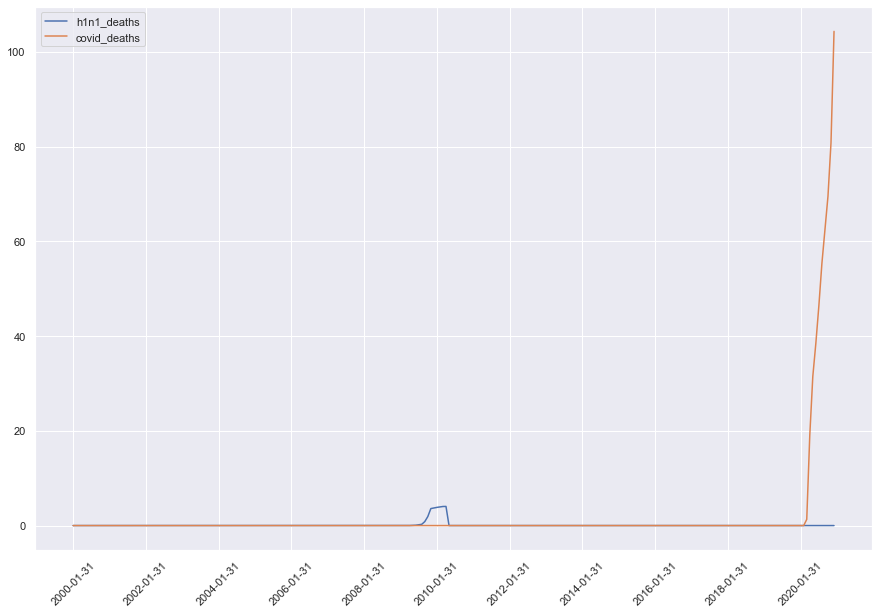

In [11]:
# If you only want to include a specific set of columns you can simply join them to the dataframe parameter in two sets of brackets. 
# This technique is shown below. 

multiline(df[['h1n1_deaths','covid_deaths']], '')

This graph shows the differnence between h1n1 deaths and covid deaths more clearly.

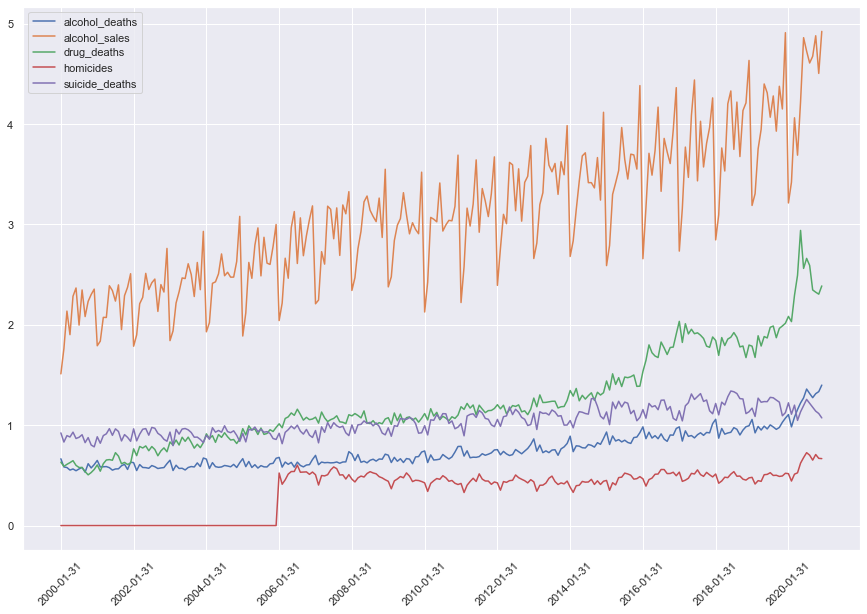

In [12]:
multiline(df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','suicide_deaths',]],'')

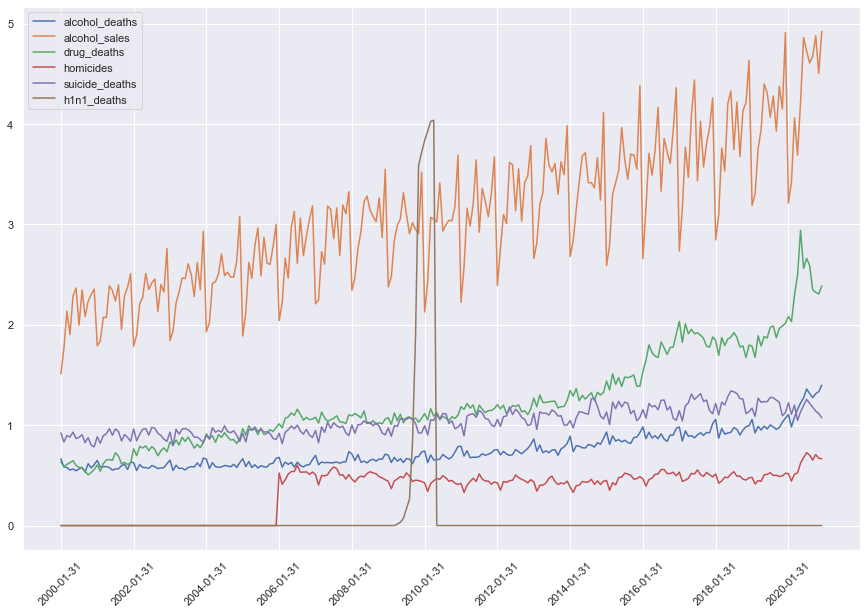

In [13]:
multiline(df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','suicide_deaths','h1n1_deaths']],'')

In [15]:
df.to_csv("for_ml.csv",index = True)